In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('final-data-h=1vs3-D=10^6-C=1000,10000.csv')

In [3]:
print(df.class_number.value_counts())

1    11540
3    11531
Name: class_number, dtype: int64


In [5]:
small_df_pd = df.sample(5000)

In [4]:
# plot_df_pd = small_df_pd
plot_df_pd = df

feature1 = 'a(n)_C=1000'
feature2 = 'chi(n)_C=1000' #'a(n)_C=10000'
cnt_series = plot_df_pd[['class_number', feature1, feature2]].groupby(['class_number', feature1, feature2]).size()
cnt_df = cnt_series.to_frame(name = 'cnt').reset_index()

In [5]:
colors = cnt_df['class_number']
color_map = {1:'red', 3:'green'}

fig = go.Figure(
    data=[go.Scattergl(
    x=cnt_df.loc[:, feature1].array,
    y=cnt_df.loc[:, feature2].array,
    mode='markers',
    opacity=0.7,
    marker=dict(
        size=cnt_df.cnt.array,
        sizemode='area',
        sizeref=2.*max(cnt_df.cnt.array)/(60.**2),
        sizemin=4,
        color=cnt_df.class_number.map(color_map),
        line=dict(color='white', width=0)
    ))]
)
fig.update_layout(
    title=feature1 + ', ' + feature2,
    scene = dict(
        xaxis=dict(
            title=feature1,
            gridcolor='white'
        ),
        yaxis=dict(
            title=feature2,
            gridcolor='white'
        ),
        bgcolor = 'white'
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
)
fig.write_html("class_number_coeffs.html")
fig.show()

In [7]:
plot_df_pd = small_df_pd

Text(0, 0.5, 'zeta_180')

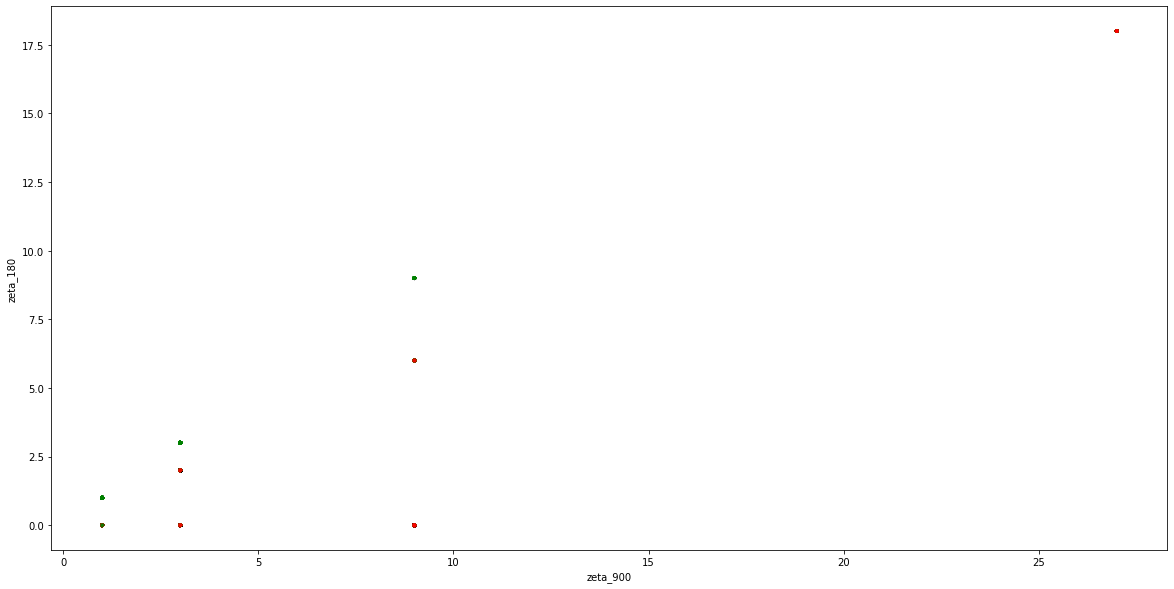

In [8]:
colors = plot_df_pd['class_number']
color_map = {1:'red', 2:'green'}
plt.figure(figsize=(20,10))
plt.scatter(plot_df_pd.a_900, plot_df_pd.a_180, s=8, alpha=0.9, c=plot_df_pd.class_number.map(color_map))
plt.xlabel("zeta_900")
plt.ylabel("zeta_180")

In [9]:
feature1 = 'res_s=0'
feature2 = 'regulator'
feature3 = 'discriminant'

dr1 = go.Scatter3d(
    x=plot_df_pd[plot_df_pd['class_number'] == 1][feature1],
    y=plot_df_pd[plot_df_pd['class_number'] == 1][feature2],
    z=plot_df_pd[plot_df_pd['class_number'] == 1][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=1)),
    name ='class_number_1'
)
dr2 = go.Scatter3d(
    x=plot_df_pd[plot_df_pd['class_number'] == 2][feature1],
    y=plot_df_pd[plot_df_pd['class_number'] == 2][feature2],
    z=plot_df_pd[plot_df_pd['class_number'] == 2][feature3],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,255,0)',
                  line=dict(width=1)),
    name ='class_number_2'
)
data = [dr1, dr2]
layout = go.Layout(
    title='class_number',
    scene = dict(
        xaxis = dict(title=feature1),
        yaxis = dict(title=feature2),
        zaxis = dict(title=feature3),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='class_number')